<a href="https://colab.research.google.com/github/xie186/Algorithms_for_DNA-Sequencing/blob/main/docs/BIOI611_scRNA_cele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#


The following note is designed to give you an overview of the kinds of comparative analyses on complex cell types that are possible using the Seurat integration procedure.

## Install required R packages

In [82]:
# # Install the remotes package
# if (!requireNamespace("remotes", quietly = TRUE)) {
#   install.packages("remotes")
# }
# # Install Seurat
# if (!requireNamespace("Seurat", quietly = TRUE)) {
#     remotes::install_github("satijalab/seurat", "seurat5", quiet = TRUE)
# }
# # Install BiocManager
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# # Install SingleR package
# if (!require("hdf5r", quietly = TRUE)){
#     BiocManager::install("hdf5r")
# }
# # Install SingleR package
# if (!require("presto", quietly = TRUE)){
#     remotes::install_github("immunogenomics/presto")
# }
# # Install SingleR package
# if (!require("SingleR", quietly = TRUE)){
#     BiocManager::install("SingleR")
# }
# if (!require("celldex", quietly = TRUE)){
#     BiocManager::install("celldex")
# }
# if (!require("SingleCellExperiment", quietly = TRUE)){
#     BiocManager::install("SingleCellExperiment")
# }
# if (!require("scater", quietly = TRUE)){
#     BiocManager::install("scater")
# }

In [83]:
## Installing the R packages could take around 51 minutes
## To speed up this process, you can download the R lib files
## saved from a working Google Colab session
## https://drive.google.com/file/d/1EQvZnsV6P0eNjbW0hwYhz0P5z0iH3bsL/view?usp=drive_link
system("gdown 1EQvZnsV6P0eNjbW0hwYhz0P5z0iH3bsL")

In [84]:
system("md5sum R_lib4scRNA.tar.gz", intern = TRUE)

[1] "5898c04fca5e680710cd6728ef9b1422  R_lib4scRNA.tar.gz"

In [85]:
## required by scater package
system("apt-get install libx11-dev libcairo2-dev") #, intern = TRUE)

In [86]:
system("tar zxvf R_lib4scRNA.tar.gz")

In [87]:
.libPaths(c("/content/usr/local/lib/R/site-library", .libPaths()))

In [88]:
.libPaths()

[1] "/content/usr/local/lib/R/site-library"
[2] "/usr/local/lib/R/site-library"        
[3] "/usr/lib/R/site-library"              
[4] "/usr/lib/R/library"

## Load required R packages

In [89]:
library(Seurat)
library(dplyr)
library(SingleR)
library(celldex)
library(scater)
library(SingleCellExperiment)

In [90]:
list.files()

[1] "cele_cellranger_mtx"                       
[2] "R_lib4scRNA.tar.gz"                        
[3] "sample_data"                               
[4] "Seurat_object_10x_cele_final.rds"          
[5] "Seurat_object_10x_cele_merged_integ.cloupe"
[6] "usr"

In [91]:
# https://drive.google.com/drive/folders/1lp6kSGFyYYAswfAyG07DgELQ2G2Ja51Q?usp=sharing
# Download "filtered_feature_bc_matrix.h5"
# Output of cellranger
system("gdown --folder 1lp6kSGFyYYAswfAyG07DgELQ2G2Ja51Q", intern = TRUE)

[1] "Processing file 1ezH8P0iRpV9fsOOqrqStPxI5-q54Ge9B filtered_feature_bc_matrix_300min.h5"
[2] "Processing file 1hu9c2BhKb5bEYXrPlG_mkSQ219eG-E2K filtered_feature_bc_matrix_400min.h5"
[3] "Processing file 16bSSWAn5Fg_sZgajA4JbuZPoVgulGt_5 filtered_feature_bc_matrix_500min.h5"

In [92]:
system("md5sum ./cele_cellranger_mtx/*.h5", intern = TRUE)

[1] "e0fd344696c5188e55aeb359efd7a8c1  ./cele_cellranger_mtx/filtered_feature_bc_matrix_300min.h5"
[2] "d087ff62ba449586858c058117aa0438  ./cele_cellranger_mtx/filtered_feature_bc_matrix_400min.h5"
[3] "efb8a9ef4898918e53a53878531f64ce  ./cele_cellranger_mtx/filtered_feature_bc_matrix_500min.h5"

In [93]:
# Specify the directory containing the .h5 files
mtx_directory <- "./cele_cellranger_mtx"

# List all .h5 files in the specified directory
mtx_file_paths <- list.files(path = mtx_directory, pattern = "\\.h5$", full.names = TRUE)

# Print the file paths
mtx_file_paths

[1] "./cele_cellranger_mtx/filtered_feature_bc_matrix_300min.h5"
[2] "./cele_cellranger_mtx/filtered_feature_bc_matrix_400min.h5"
[3] "./cele_cellranger_mtx/filtered_feature_bc_matrix_500min.h5"

In [94]:
# Read the files into a list
count_mtx_list <- lapply(mtx_file_paths, Read10X_h5)

In [95]:
names(count_mtx_list) <- c("300min", "400min", "500min")
names(count_mtx_list)

[1] "300min" "400min" "500min"

In [96]:
lapply(count_mtx_list, class)

$`300min`
[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

$`400min`
[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

$`500min`
[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [97]:
print(format(object.size(count_mtx_list), units = "MB"))

[1] "829.8 Mb"


In [98]:
sample_names <- names(count_mtx_list)


In [99]:
seurat_obj_list <- list()
for (i in seq_along(count_mtx_list)) {
  seurat_obj <- CreateSeuratObject(counts = count_mtx_list[[i]],
                                   project = sample_names[i])
  seurat_obj_list[[sample_names[i]]] <- seurat_obj
}

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [100]:
seurat_obj_list

$`300min`
An object of class Seurat 
19985 features across 25996 samples within 1 assay 
Active assay: RNA (19985 features, 0 variable features)
 1 layer present: counts

$`400min`
An object of class Seurat 
19985 features across 37944 samples within 1 assay 
Active assay: RNA (19985 features, 0 variable features)
 1 layer present: counts

$`500min`
An object of class Seurat 
19985 features across 14378 samples within 1 assay 
Active assay: RNA (19985 features, 0 variable features)
 1 layer present: counts


In [101]:
rm(count_mtx_list); gc();

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11635606,621.5,19318555,1031.8,19318555,1031.8
Vcells,186236112,1420.9,452720458,3454.0,408721402,3118.3


### Access Seurat object

In [102]:
seurat_obj_list$'300min'@active.assay

[1] "RNA"

In [103]:
class(seurat_obj_list$'300min'@meta.data)
head(seurat_obj_list$'300min'@meta.data, 4)

[1] "data.frame"

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACCTGAGACAATAC-1,300min,1630,803
AAACCTGAGACACTAA-1,300min,3147,1365
AAACCTGAGACGCTTT-1,300min,892,586
AAACCTGAGAGGGCTT-1,300min,1666,1033


In [104]:
seurat_obj_list$'300min'@meta.data$orig.ident = "300min"
seurat_obj_list$'400min'@meta.data$orig.ident = "400min"
seurat_obj_list$'500min'@meta.data$orig.ident = "500min"

In [105]:
head(seurat_obj_list$'300min'@meta.data, 4)

,orig.ident,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>
AAACCTGAGACAATAC-1,300min,1630,803
AAACCTGAGACACTAA-1,300min,3147,1365
AAACCTGAGACGCTTT-1,300min,892,586
AAACCTGAGAGGGCTT-1,300min,1666,1033


In [106]:
Layers(seurat_obj_list$'300min')

[1] "counts"

In [107]:
seurat_obj_list$'300min'@version

[1] ‘5.0.2’

## Data preprocessing

Ensembl biomart can be used to extract the mitochodria genes:

https://useast.ensembl.org/info/website/archives/assembly.html

| Gene stable ID | Gene name      |
|----------------|----------------|
| WBGene00000829 | ctb-1          |
| WBGene00010957 | nduo-6         |
| WBGene00010958 | WBGene00010958 |
| WBGene00010959 | WBGene00010959 |
| WBGene00010960 | atp-6          |
| WBGene00010961 | nduo-2         |
| WBGene00010962 | ctc-3          |
| WBGene00010963 | nduo-4         |
| WBGene00010964 | ctc-1          |
| WBGene00010965 | ctc-2          |
| WBGene00010966 | nduo-3         |
| WBGene00010967 | nduo-5         |

In [108]:
# Define the mitochondria gene names as an R vector
mt_gene_names <- c(
  "ctb-1", "nduo-6", "WBGene00010958", "WBGene00010959",
  "atp-6", "nduo-2", "ctc-3", "nduo-4",
  "ctc-1", "ctc-2", "nduo-3", "nduo-5"
)
mt_genes <- mt_gene_names[mt_gene_names %in% rownames(seurat_obj_list$'300min')]
mt_genes

[1] "ctb-1"          "nduo-6"         "WBGene00010958" "WBGene00010959"
 [5] "atp-6"          "nduo-2"         "ctc-3"          "nduo-4"        
 [9] "ctc-1"          "ctc-2"          "nduo-3"         "nduo-5"

In [109]:
# Function to calculate percentage of mitochondrial genes
add_mt_percentage <- function(seurat_obj, mt_genes) {
  # Calculate percentage of mitochondrial genes
  seurat_obj$percent.mt <- PercentageFeatureSet(seurat_obj, features = mt_genes)
  return(seurat_obj)
}

In [110]:
seurat_obj_list <- lapply(seurat_obj_list, add_mt_percentage, mt_genes = mt_genes)

In [111]:
qc_features <- c("nFeature_RNA", "nCount_RNA", "percent.mt")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


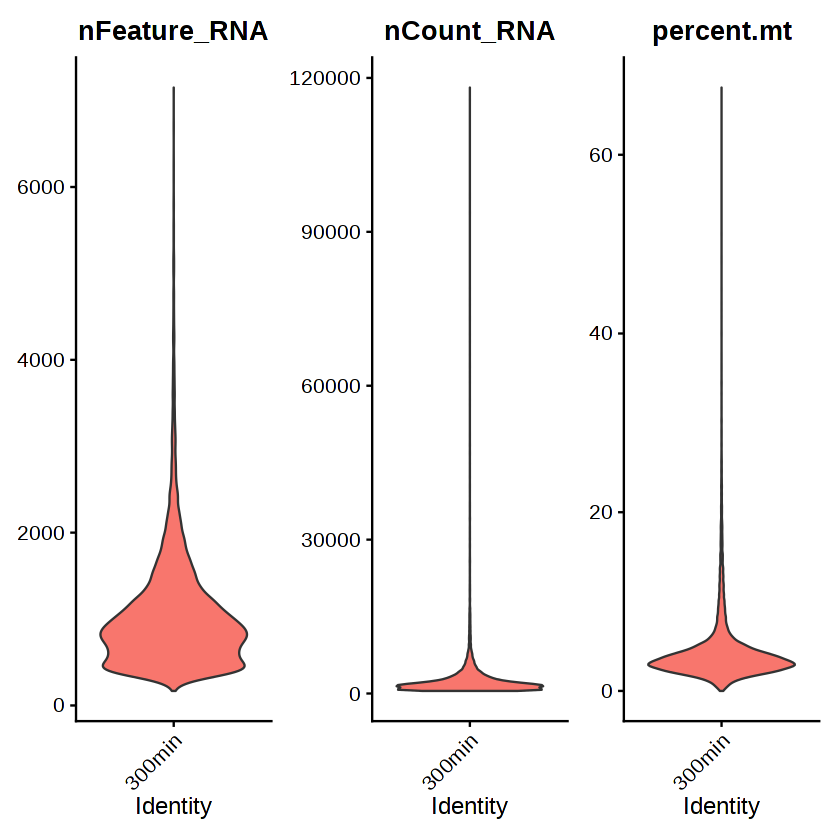

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


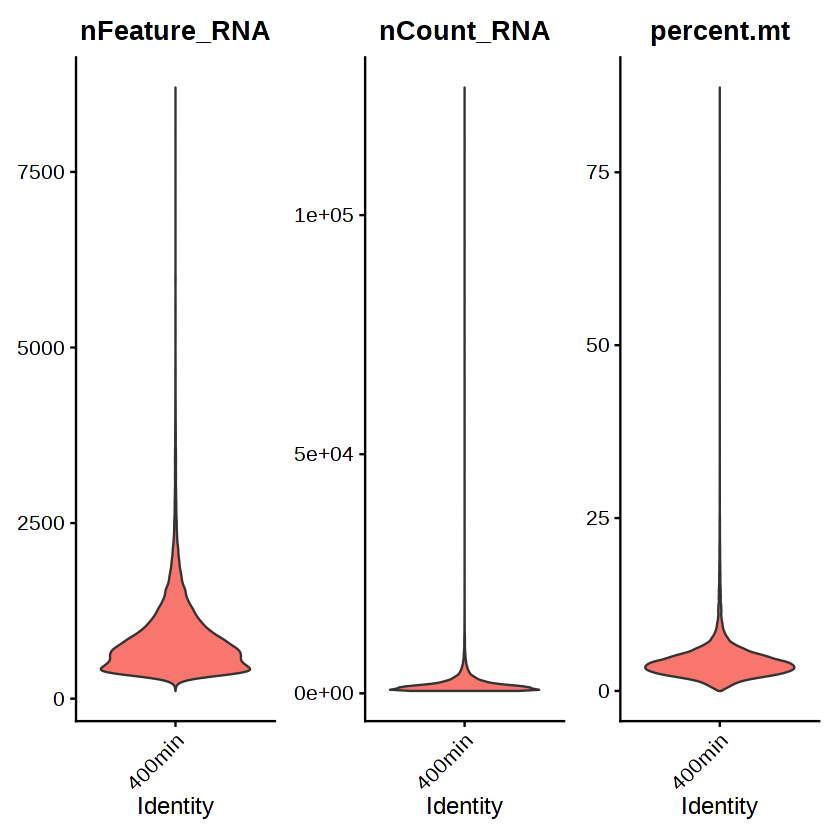

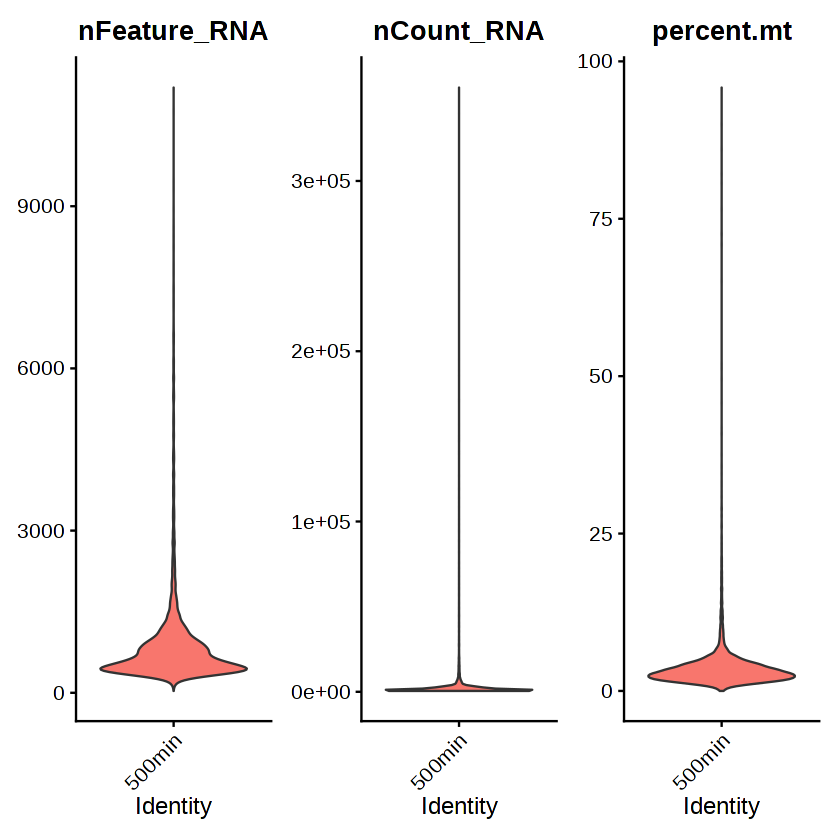

In [112]:
VlnPlot(seurat_obj_list$'300min', features = qc_features, ncol = 3, pt.size=0)
VlnPlot(seurat_obj_list$'400min', features = qc_features, ncol = 3, pt.size=0)
VlnPlot(seurat_obj_list$'500min', features = qc_features, ncol = 3, pt.size=0)

###  How to interpret QC plot


`nFeature_RNA`: The number of unique features (genes) detected per cell.

Extremely high values could suggest potential doublets (two cells mistakenly captured as one), as two cells would have more unique genes combined.

Low number of detected genes - potential ambient mRNA (not real cells)


`nCount_RNA`: The total number of RNA molecules (or unique molecular identifiers, UMIs) detected per cell.

Higher counts generally indicate higher RNA content, but they could also result from cell doublets.
Cells with very low nCount_RNA might represent poor-quality cells with low RNA capture, while very high counts may also suggest doublets.

`percent.mt`: The percentage of reads mapping to mitochondrial genes.

High mitochondrial content often indicates cell stress or apoptosis, as damaged cells tend to release mitochondrial RNA.

Filtering cells with high `percent.mt` values is common to exclude potentially dying cells.

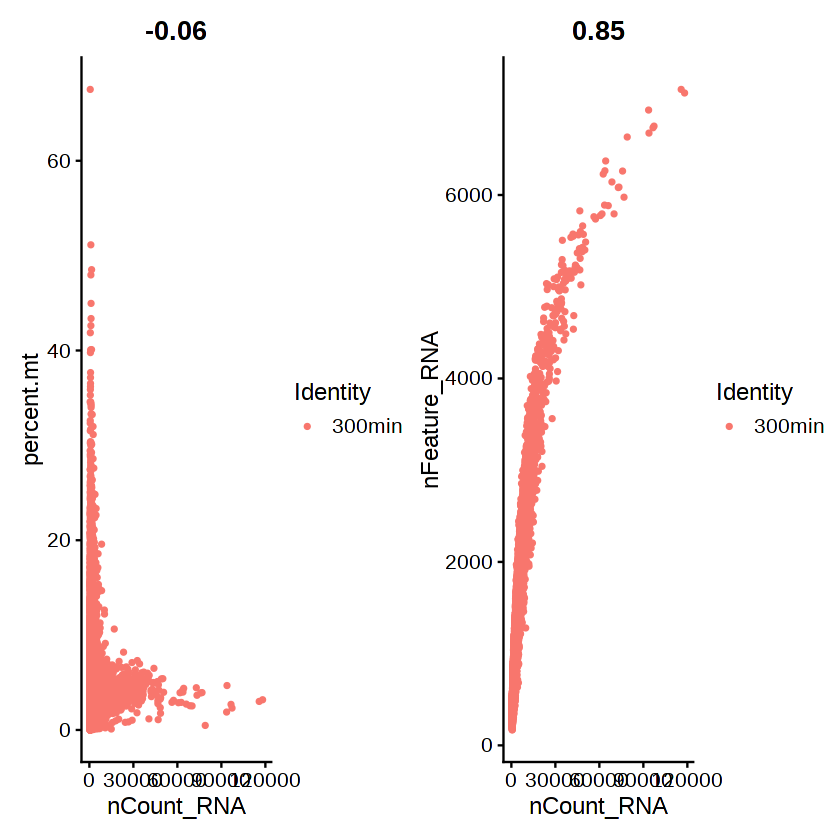

In [113]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(seurat_obj_list$'300min', feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(seurat_obj_list$'300min', feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

### Filter out potential doublets, empty droplets and dying cells

In [114]:
# Load necessary libraries
library(Seurat)
library(ggplot2)

# Define the function to calculate median and MAD values
calculate_thresholds <- function(seurat_obj) {
  # Extract relevant columns
  nFeature_values <- seurat_obj@meta.data$nFeature_RNA
  nCount_values <- seurat_obj@meta.data$nCount_RNA
  percent_mt_values <- seurat_obj@meta.data$percent.mt

  # Calculate medians and MADs
  nFeature_median <- median(nFeature_values, na.rm = TRUE)
  nFeature_mad <- mad(nFeature_values, constant = 1, na.rm = TRUE)

  nCount_median <- median(nCount_values, na.rm = TRUE)
  nCount_mad <- mad(nCount_values, constant = 1, na.rm = TRUE)

  percent_mt_median <- median(percent_mt_values, na.rm = TRUE)
  percent_mt_mad <- mad(percent_mt_values, constant = 1, na.rm = TRUE)

  # Calculate thresholds for horizontal lines
  thresholds <- list(
    nFeature_upper = nFeature_median + 4 * nFeature_mad,
    nFeature_lower = nFeature_median - 4 * nFeature_mad,
    nCount_upper = nCount_median + 4 * nCount_mad,
    nCount_lower = nCount_median - 4 * nCount_mad,
    percent_mt_upper = percent_mt_median + 4 * percent_mt_mad
  )

  return(thresholds)
}

# Define a function to filter Seurat objects
filter_seurat_obj <- function(seurat_obj) {
  # Calculate thresholds
  thresholds <- calculate_thresholds(seurat_obj)

  # Apply filtering
  seurat_obj <- subset(
    seurat_obj,
    subset = nFeature_RNA > thresholds$nFeature_lower &
             nFeature_RNA < thresholds$nFeature_upper &
             percent.mt < thresholds$percent_mt_upper
  )
  #
  return(seurat_obj)
}


In [115]:
# Apply filtering to each Seurat object in the list
seurat_obj_list <- lapply(seurat_obj_list, filter_seurat_obj)

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


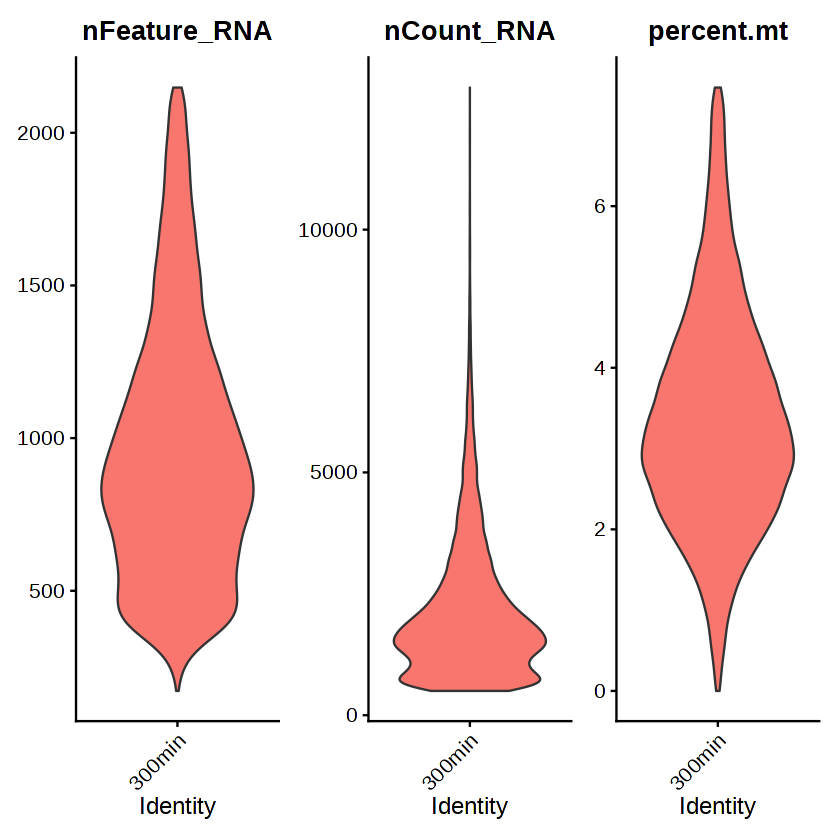

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


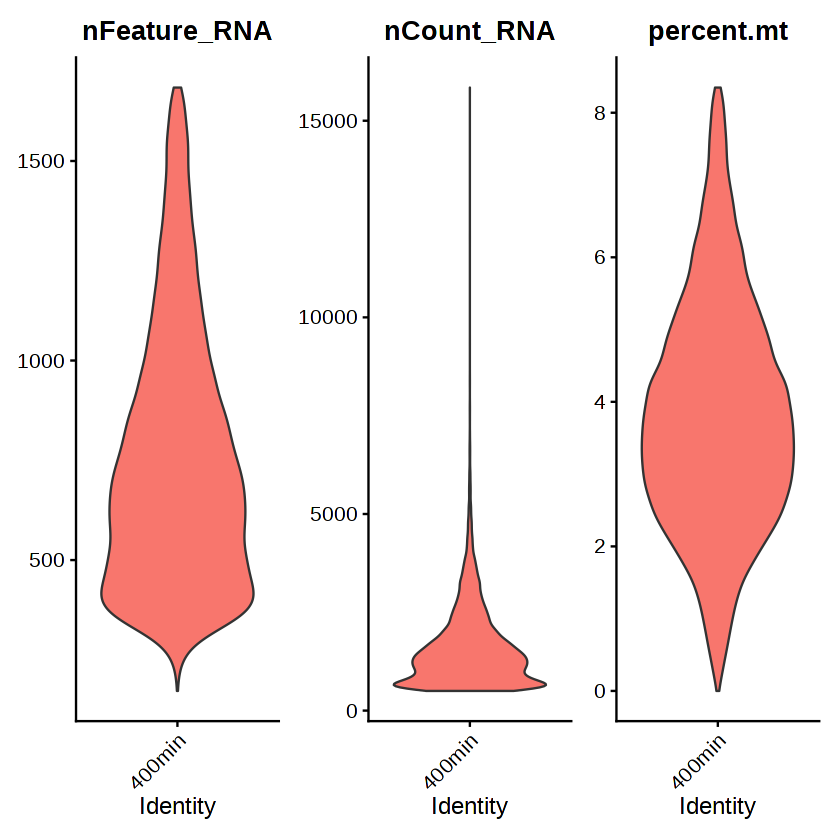

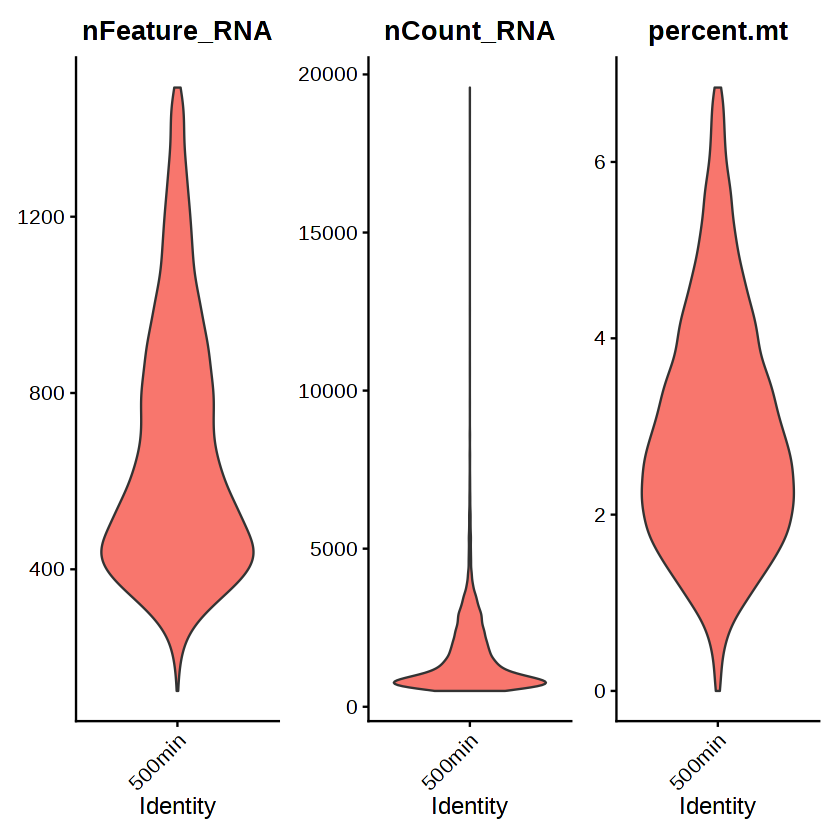

In [118]:
VlnPlot(seurat_obj_list$'300min', features = qc_features, ncol = 3, pt.size=0)
VlnPlot(seurat_obj_list$'400min', features = qc_features, ncol = 3, pt.size=0)
VlnPlot(seurat_obj_list$'500min', features = qc_features, ncol = 3, pt.size=0)

In [119]:
RandomSubsetSeurat <- function(seurat_obj, subset_size, seed = NULL) {
  # Optionally set a random seed for reproducibility
  if (!is.null(seed)) {
    set.seed(seed)
  }

  # Get all cell names
  total_cells <- Cells(seurat_obj)

  # Ensure subset size is not larger than the total number of cells
  if (subset_size > length(total_cells)) {
    stop("Subset size exceeds the total number of cells in the Seurat object.")
  }

  # Randomly sample a subset of cell names
  subset_cells <- sample(total_cells, size = subset_size)

  # Create a new Seurat object with the subsetted cells
  subset_seurat_obj <- subset(seurat_obj, cells = subset_cells)

  return(subset_seurat_obj)
}


⚠️ Important

This is included only to reduce the memory used. In real project, you don't want to perform this step. Instead, you should request larger memory computing resources.


In [120]:
seurat_obj_list <- lapply(seurat_obj_list,
                      RandomSubsetSeurat,
                      subset_size = 2000,
                      seed = 123)

In [121]:
so_merged <- merge(seurat_obj_list$'300min',
         c(seurat_obj_list$'400min', seurat_obj_list$'500min'),
         add.cell.ids = c("300min", "400min", "500min"),
         project = "scRNA_cele")
so_merged
Layers(so_merged)
table(so_merged$orig.ident)

An object of class Seurat 
19985 features across 6000 samples within 1 assay 
Active assay: RNA (19985 features, 0 variable features)
 3 layers present: counts.300min, counts.400min, counts.500min

[1] "counts.300min" "counts.400min" "counts.500min"


300min 400min 500min 
  2000   2000   2000 

In [122]:
#rm(seurat_obj_list); gc();


Instead of using an arbitrary number, you can also use statistical algorithm to predict doublets and empty droplets to filter the cells, such as `DoubletFinder` and `EmptyDrops`.



### Normalization, ccaling of the data and linear dimensional reduction


### Normalization

After removing unwanted cells from the dataset, the next step is to normalize the data. By default, a global-scaling normalization method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression, multiplies this by a scale factor (10,000 by default), and log-transforms the result. In Seurat v5, Normalized values are stored in `pbmc[["RNA"]]$data`.



While this method of normalization is standard and widely used in scRNA-seq analysis, global-scaling relies on an assumption that each cell originally contains the same number of RNA molecules.

Next, we identify a subset of features that show high variation across cells in the dataset—meaning they are highly expressed in some cells and lowly expressed in others. Prior work, including our own, has shown that focusing on these variable genes in downstream analyses can enhance the detection of biological signals in single-cell datasets.

The approach used in Seurat improves upon previous versions by directly modeling the inherent mean-variance relationship in single-cell data. This method is implemented in the FindVariableFeatures() function, which, by default, selects 2,000 variable features per dataset. These features will then be used in downstream analyses, such as PCA.

### Scaling the data

Next, we apply a linear transformation (`scaling`) that is a standard pre-processing step prior to dimensional reduction techniques like PCA. The `ScaleData()` function:

Shifts the expression of each gene, so that the mean expression across cells is 0
Scales the expression of each gene, so that the variance across cells is 1

This step gives equal weight in downstream analyses, so that highly-expressed genes do not dominate

The results of this are stored in `pbmc[["RNA"]]$scale.data`

By default, only variable features are scaled.
You can specify the features argument to scale additional features.


In [124]:
# run standard anlaysis workflow
so_merged <- NormalizeData(so_merged)
so_merged <- FindVariableFeatures(so_merged)
so_merged <- ScaleData(so_merged)
so_merged <- RunPCA(so_merged)

Normalizing layer: counts.300min

Normalizing layer: counts.400min

Normalizing layer: counts.500min

Finding variable features for layer counts.300min

Finding variable features for layer counts.400min

Finding variable features for layer counts.500min

Centering and scaling data matrix

PC_ 1 
Positive:  noah-1, noah-2, dpy-2, dpy-3, mlt-11, col-76, mlt-8, dpy-7, dpy-10, hch-1 
	   col-121, dpy-17, dpy-14, txdc-12.2, sym-1, C01H6.8, Y41D4B.6, sqt-3, Y23H5B.8, K02E10.4 
	   acn-1, C05C8.7, C26B9.3, R148.5, C48E7.1, dsl-6, inx-12, cpg-24, R05D3.9, F37C4.4 
Negative:  ost-1, pat-10, D2092.4, mlc-3, let-2, unc-15, lev-11, emb-9, tni-1, set-18 
	   tnt-3, sgn-1, test-1, hsp-12.1, unc-98, cpn-3, sgcb-1, F53F10.1, spp-15, mup-2 
	   Y71F9AR.2, mlc-1, C29F5.1, mlc-2, clik-1, stn-2, mig-18, F21H7.3, unc-60, Y73F8A.26 
PC_ 2 
Positive:  asp-4, enpl-1, C50F4.6, T02E9.5, his-24, atz-1, R07E5.17, C03C10.5, nphp-1, hil-3 
	   tmem-231, mksr-2, tctn-1, fmi-1, jbts-14, osm-5, bbs-9, ift-81, fbxb-66,

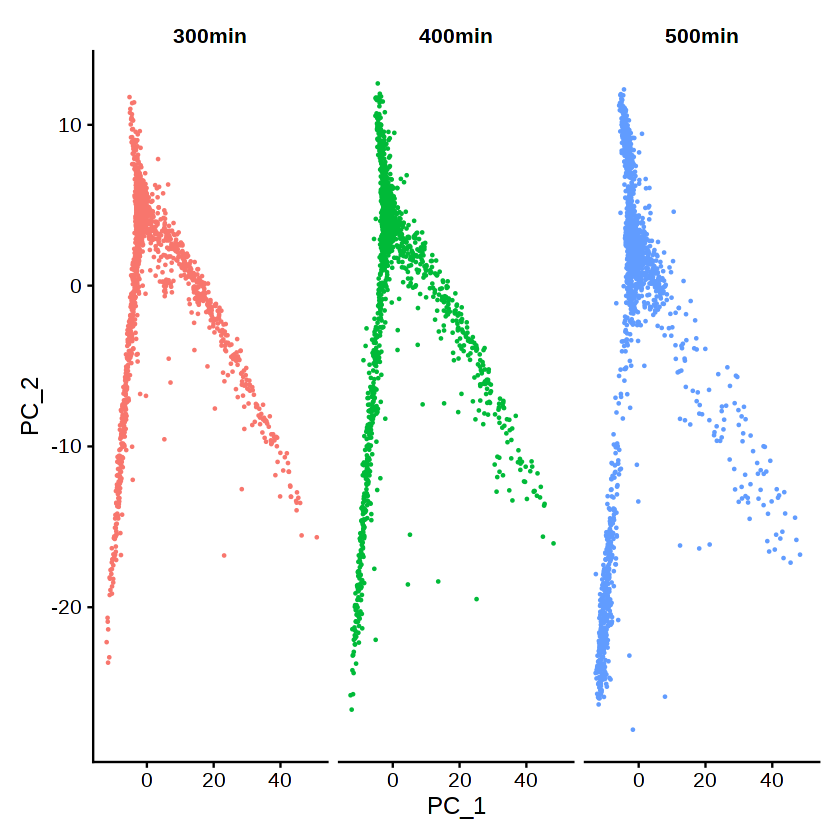

In [125]:
DimPlot(so_merged,
        reduction = "pca",
        split.by = 'orig.ident',
        label.color = "black") +
        NoLegend()

In [126]:
so_merged <- FindNeighbors(so_merged,
                           dims = 1:30, reduction = "pca")
so_merged <- FindClusters(so_merged,
                           resolution = 2,
                           cluster.name = "unintegrated_clusters")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6000
Number of edges: 197290

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8357
Number of communities: 37
Elapsed time: 0 seconds


You have several useful ways to visualize both cells and features that define the PCA, including `VizDimReduction()`, `DimPlot()`, and `DimHeatmap()`.




`DimHeatmap()` draws a heatmap focusing on a principal component. Both cells and genes are sorted by their principal component scores

## Perform analysis without integration


To visualize and explore these datasets, Seurat  offers several non-linear dimensional reduction techniques, such as tSNE and UMAP.

The goal of tSNE/UMAP is to learn underlying structure in the dataset, in order to place similar cells together in low-dimensional space. Therefore, cells that are grouped together within graph-based clusters determined above should co-localize on these dimension reduction plots.


In [127]:
so_merged <- RunUMAP(so_merged,
              dims = 1:30,
              reduction = "pca",
              reduction.name = "umap.unintegrated")

20:05:29 UMAP embedding parameters a = 0.9922 b = 1.112

20:05:29 Read 6000 rows and found 30 numeric columns

20:05:29 Using Annoy for neighbor search, n_neighbors = 30

20:05:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:05:30 Writing NN index file to temp file /tmp/RtmplOFSb7/file1d377d41787

20:05:30 Searching Annoy index using 1 thread, search_k = 3000

20:05:33 Annoy recall = 100%

20:05:34 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:05:36 Initializing from normalized Laplacian + noise (using RSpectra)

20:05:36 Commencing optimization for 500 epochs, with 241186 positive edges

20:05:46 Optimization finished



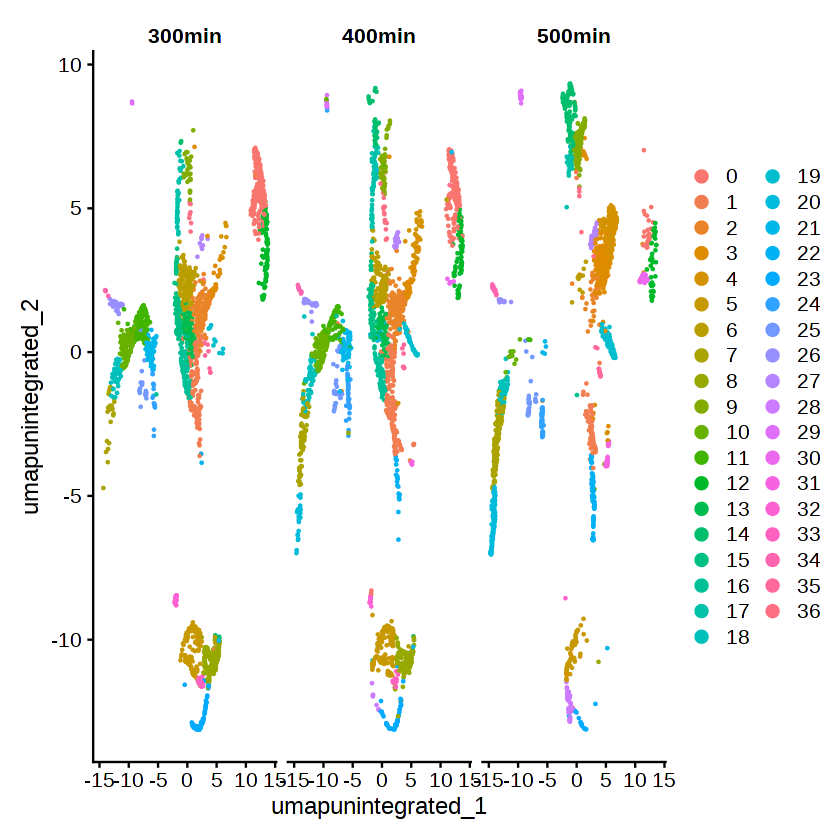

In [128]:
DimPlot(so_merged,
             reduction = "umap.unintegrated",
             split.by = c("orig.ident"))

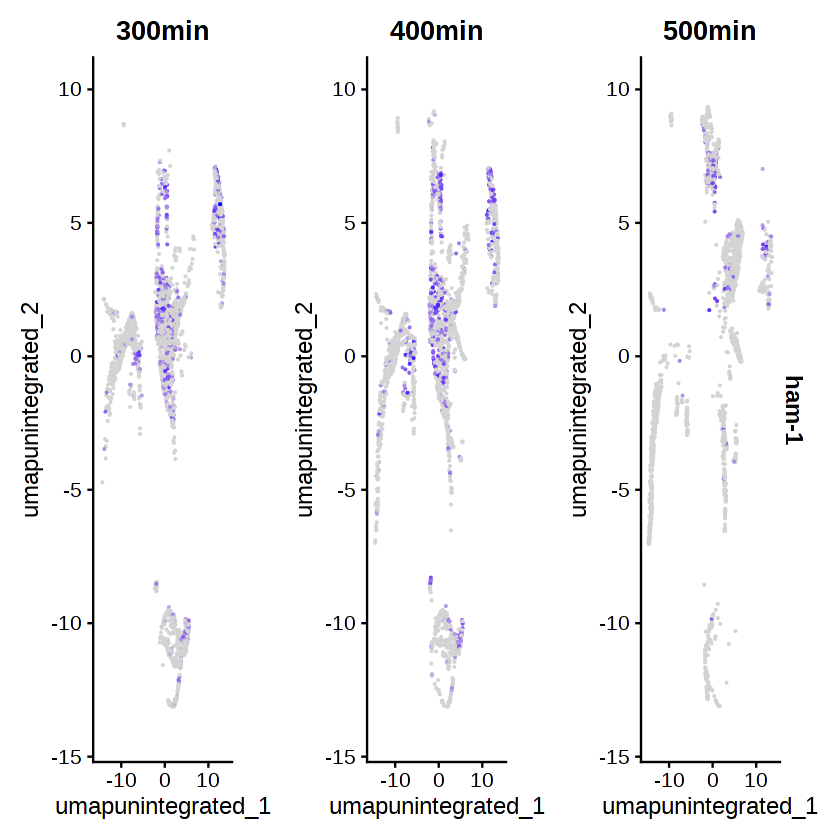

In [129]:
FeaturePlot(so_merged, feature="ham-1", pt.size = 0.1,
             split.by = c("orig.ident"))

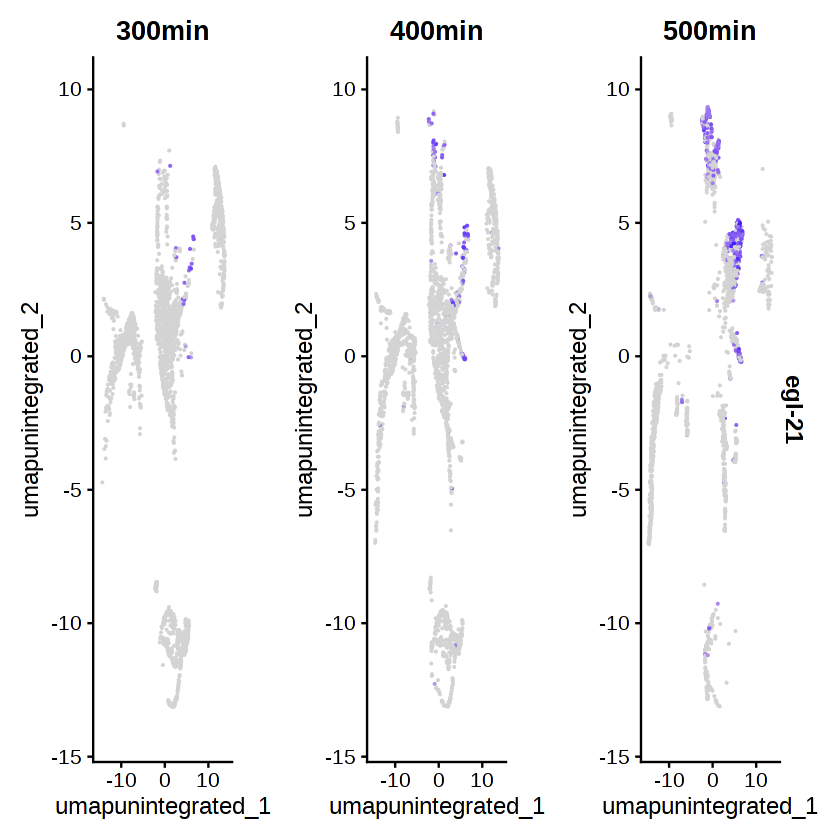

In [130]:
FeaturePlot(so_merged, feature="egl-21", pt.size = 0.1,
             split.by = c("orig.ident"))

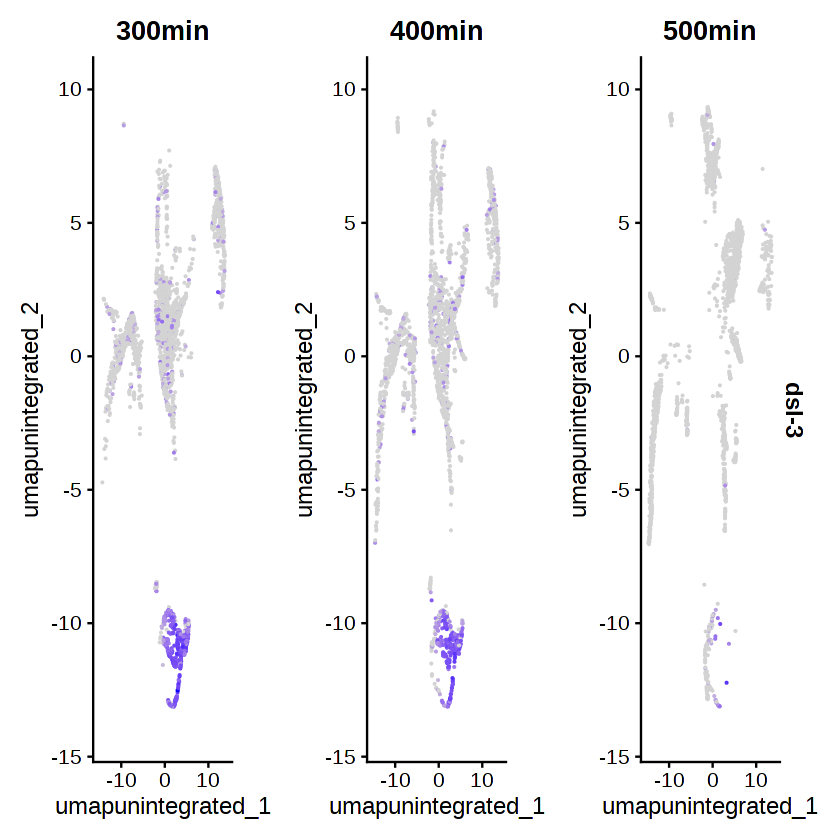

In [131]:
FeaturePlot(so_merged, feature="dsl-3", pt.size = 0.1,
             split.by = c("orig.ident"))

## Perform integration

Seurat v5 enables streamlined integrative analysis using the IntegrateLayers function. The method currently supports five integration methods. Each of these methods performs integration in low-dimensional space, and returns a dimensional reduction (i.e. integrated.rpca) that aims to co-embed shared cell types across batches:

* Anchor-based CCA integration (method=CCAIntegration)
* Harmony (method=HarmonyIntegration)
* Anchor-based RPCA integration (method=RPCAIntegration)
* FastMNN (method= FastMNNIntegration)
* scVI (method=scVIIntegration)


Canonical correlation analysis: CCA

Reciprocal PCA: RPCA

`CCAIntegration` integration method that is available in the Seurat package utilizes the canonical correlation analysis (CCA). This method expects “correspondences” or shared biological states among at least a subset of single cells across the groups.

In [132]:
so_merged_integ <- IntegrateLayers(object = so_merged,
                method = CCAIntegration, orig.reduction = "pca",
                new.reduction = "integrated.cca",
                verbose = FALSE)


Once integrative analysis is complete, you can rejoin the layers - which collapses the individual datasets together and recreates the original `counts` and `data` layers. You will need to do this before performing any differential expression analysis. However, you can always resplit the layers in case you would like to reperform integrative analysis.

In [133]:
# re-join layers after integration
so_merged_integ[["RNA"]] <- JoinLayers(so_merged_integ[["RNA"]])


In [134]:

so_merged_integ <- FindNeighbors(so_merged_integ,
                   reduction = "integrated.cca", dims = 1:30)
so_merged_integ <- FindClusters(so_merged_integ, resolution = 2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6000
Number of edges: 203509

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8373
Number of communities: 37
Elapsed time: 0 seconds


In [135]:
so_merged_integ <- RunUMAP(so_merged_integ,
                          dims = 1:30,
                          reduction = "integrated.cca")


20:06:17 UMAP embedding parameters a = 0.9922 b = 1.112

20:06:17 Read 6000 rows and found 30 numeric columns

20:06:17 Using Annoy for neighbor search, n_neighbors = 30

20:06:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:06:19 Writing NN index file to temp file /tmp/RtmplOFSb7/file1d33c2523ec

20:06:19 Searching Annoy index using 1 thread, search_k = 3000

20:06:21 Annoy recall = 100%

20:06:22 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

20:06:25 Initializing from normalized Laplacian + noise (using RSpectra)

20:06:25 Commencing optimization for 500 epochs, with 243916 positive edges

20:06:34 Optimization finished



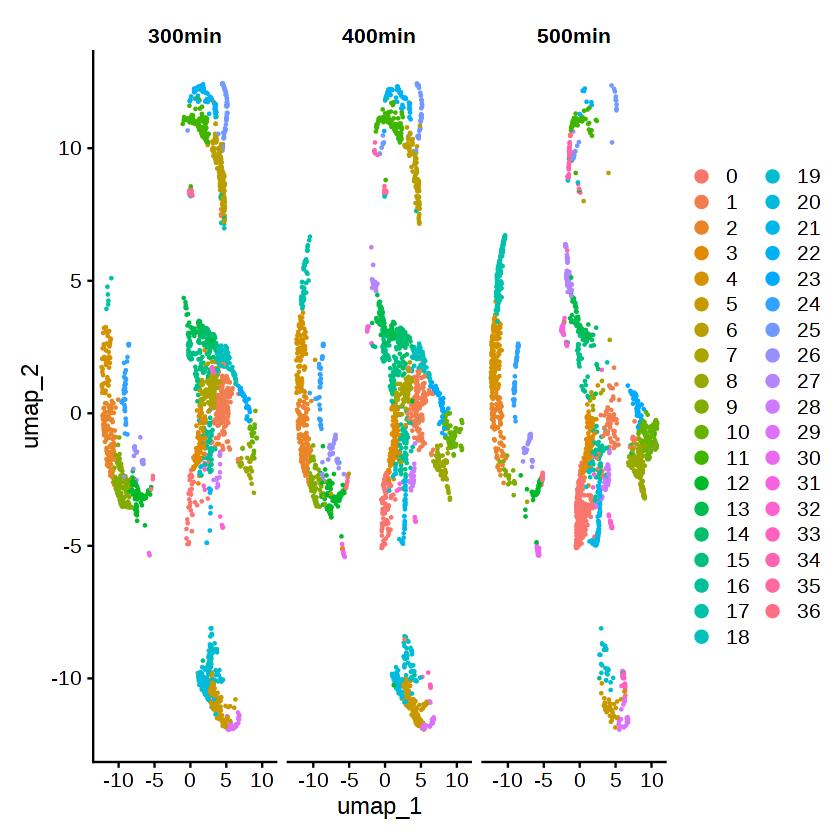

In [136]:
DimPlot(so_merged_integ,
             reduction = "umap",
             split.by = c("orig.ident"))

In [137]:
DefaultAssay(so_merged_integ)

[1] "RNA"

In [138]:
markers <- FindAllMarkers(so_merged_integ)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32

Calculating cluster 33

Calculating cluster 34

Calculating cluster 35

Calculating cluster 36



Warning message in DoHeatmap(so_merged_integ, features = top2$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: nmur-3, timp-1, acp-6, C14A4.6, skpo-2, mltn-13, srw-12, F59C6.8, T03G11.9, C02F5.2, C33D9.10, lev-9, C08F1.6, cank-26, egl-21”


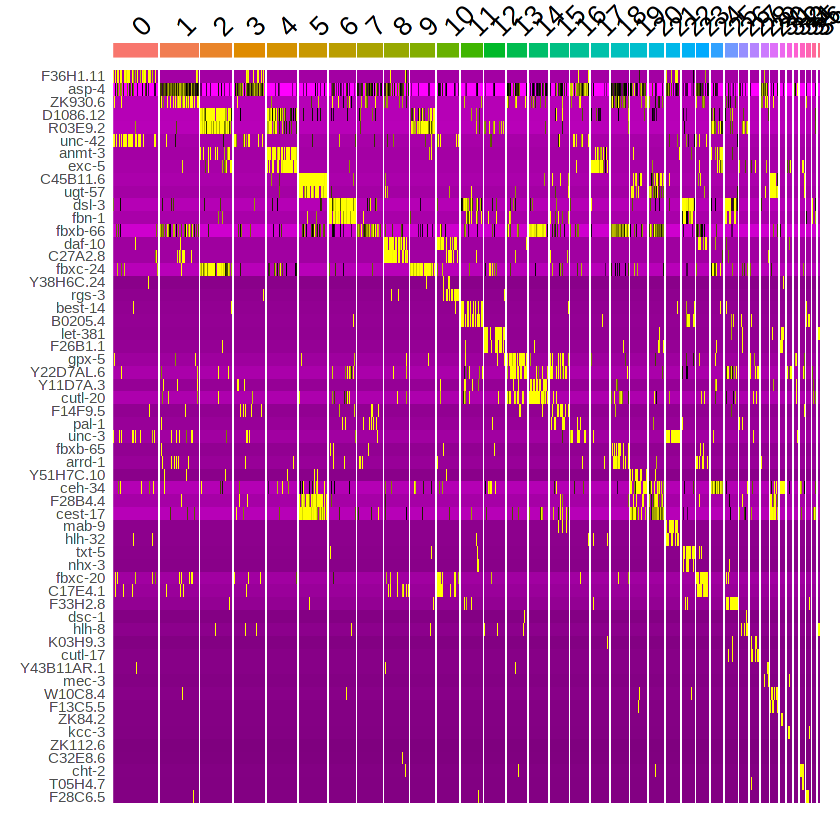

In [139]:
markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 2) %>%
    ungroup() -> top2
DoHeatmap(so_merged_integ, features = top2$gene) + NoLegend()

In [140]:
head(markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
F36H1.11,0.000000e+00,5.450659,0.570,0.048,0.000000e+00,0,F36H1.11
egl-21,1.563079e-282,3.984563,0.577,0.058,3.123813e-278,0,egl-21
T10B5.4,1.850416e-276,3.373848,0.792,0.138,3.698057e-272,0,T10B5.4
madd-4,1.841569e-242,4.579571,0.420,0.030,3.680376e-238,0,madd-4
F28E10.1,8.224195e-225,3.734330,0.746,0.167,1.643605e-220,0,F28E10.1
C31H5.5,8.048185e-222,4.466041,0.411,0.034,1.608430e-217,0,C31H5.5


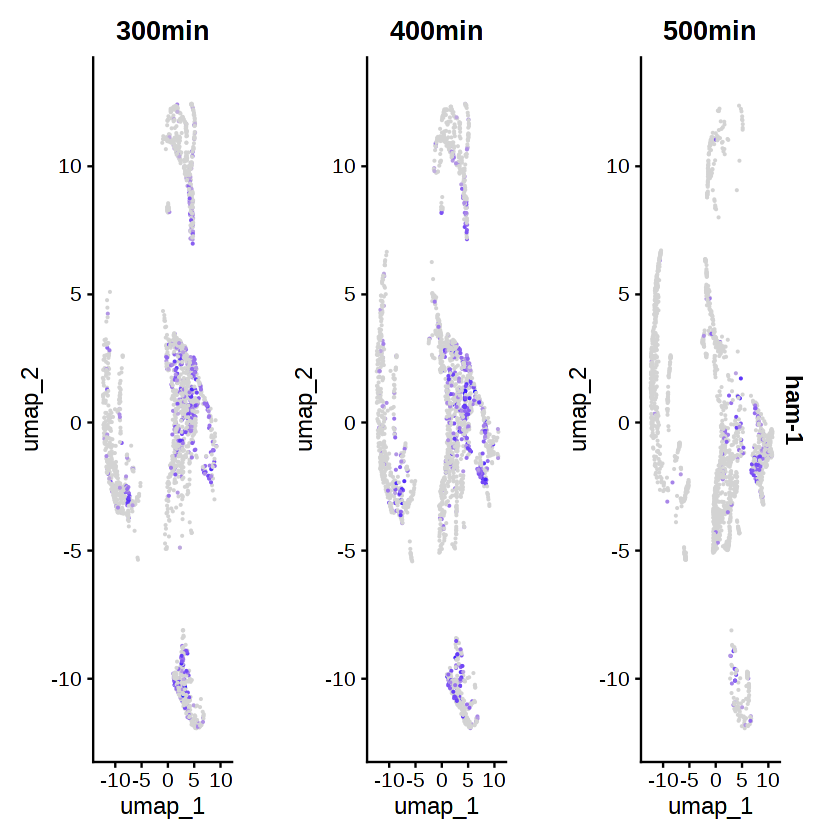

In [141]:
FeaturePlot(so_merged_integ, reduction = "umap", feature="ham-1", pt.size = 0.1,
             split.by = c("orig.ident"))

In [142]:
so_merged_integ

An object of class Seurat 
19985 features across 6000 samples within 1 assay 
Active assay: RNA (19985 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap

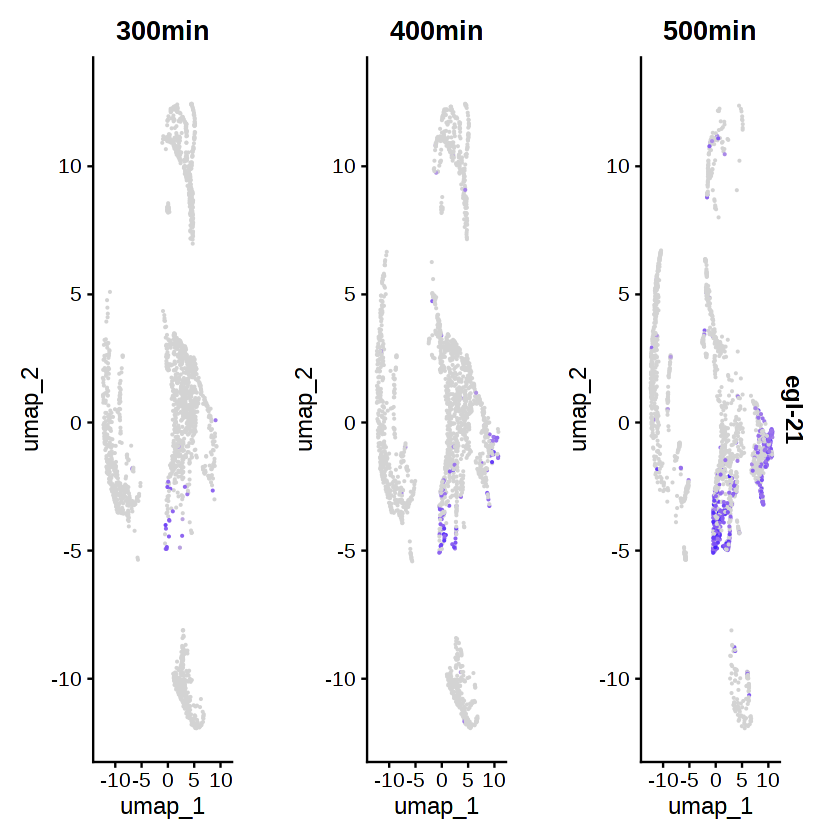

In [143]:
FeaturePlot(so_merged_integ, reduction = "umap", feature="egl-21", pt.size = 0.1,
             split.by = c("orig.ident"))

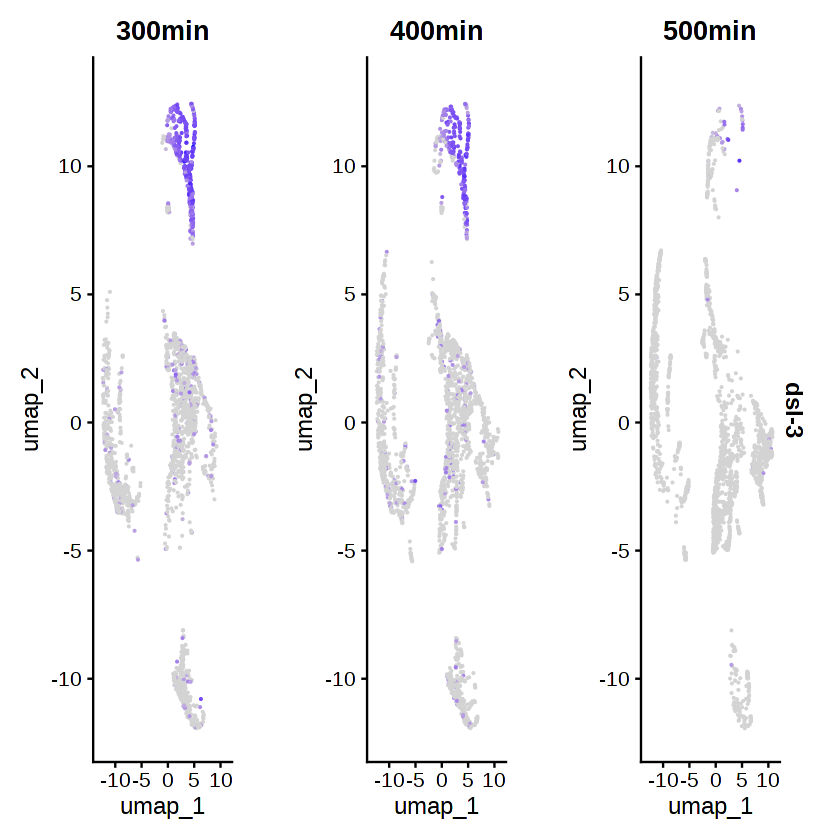

In [144]:
FeaturePlot(so_merged_integ, reduction = "umap", feature="dsl-3", pt.size = 0.1,
             split.by = c("orig.ident"))

With the integrated Seurat object, you can perform cell type annotation using marker genes.

## Save the Seurat object

In [145]:
saveRDS(so_merged_integ, file = "Seurat_object_10x_cele_final.rds")

In [146]:
remotes::install_github("10xGenomics/loupeR")
loupeR::setup()

Skipping install of 'loupeR' from a github remote, the SHA1 (a169417e) has not changed since last install.
  Use `force = TRUE` to force installation



In [147]:
library(loupeR)

In [148]:
create_loupe_from_seurat(so_merged_integ,
                output_name = "Seurat_object_10x_cele_merged_integ",
                force = TRUE)


2024/12/02 20:07:54 extracting matrix, clusters, and projections

2024/12/02 20:07:54 selected assay: RNA

2024/12/02 20:07:54 selected clusters: active_cluster orig.ident unintegrated_clusters seurat_clusters RNA_snn_res.2

2024/12/02 20:07:54 selected projections: umap.unintegrated umap

2024/12/02 20:07:54 validating count matrix

2024/12/02 20:07:55 validating clusters

2024/12/02 20:07:55 validating projections

2024/12/02 20:07:55 creating temporary hdf5 file: /tmp/RtmplOFSb7/file1d3525ac480.h5

2024/12/02 20:07:57 invoking louper executable

2024/12/02 20:07:57 running command: "/root/.local/share/R/loupeR/louper create --input='/tmp/RtmplOFSb7/file1d3525ac480.h5' --output='/content/Seurat_object_10x_cele_merged_integ.cloupe' --force"



## Reference

https://monashbioinformaticsplatform.github.io/Single-Cell-Workshop/pbmc3k_tutorial.html

https://bioinformatics.ccr.cancer.gov/docs/getting-started-with-scrna-seq/IntroToR_Seurat/

https://hbctraining.github.io/scRNA-seq/lessons/elbow_plot_metric.html

https://satijalab.org/seurat/articles/integration_introduction

